# Project: Gun data in different states of U.S.A.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>There's alot info. about guns in diff. states.
>Let's put questions that we can answer according to the data given in gun_data.xlsx

>1-What is the total number of each type of guns,prepawn_guns,redemption_guns,etc. in each state?

>2-How many guns(each type) were sold in each month in the given data?

In [59]:
###lets import necessary libraries and the file we will use
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
###using pandas to read excel file
df=pd.read_excel('gun_data.xlsx')
df.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


<a id='wrangling'></a>
## Data Wrangling

>Now,lets make this data clear , callable and meaningful.

### First, gathering and Accessing data
### Second, clean missing,duplicated and incorrect data

In [60]:
print(df.shape)
df.info()
###we need info about that fata we were given

(12485, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
retur

In [61]:
df.duplicated().sum()
###is there any duplicated rows..?

0

In [62]:
df.isnull().sum()
###what about NAN values?

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [63]:
df.dropna(inplace=True)
#now we have to drop missing values to have aclear data

In [64]:
df.isnull().sum()
###lets confirm our code

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [65]:
df.info()
###making sure that drop function does its work

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Data columns (total 27 columns):
month                        770 non-null object
state                        770 non-null object
permit                       770 non-null float64
permit_recheck               770 non-null float64
handgun                      770 non-null float64
long_gun                     770 non-null float64
other                        770 non-null float64
multiple                     770 non-null int64
admin                        770 non-null float64
prepawn_handgun              770 non-null float64
prepawn_long_gun             770 non-null float64
prepawn_other                770 non-null float64
redemption_handgun           770 non-null float64
redemption_long_gun          770 non-null float64
redemption_other             770 non-null float64
returned_handgun             770 non-null float64
returned_long_gun            770 non-null float64
returned_other               770 non-null float64

In [66]:
df['multiple']=df['multiple'].astype(float)
###lets have the same type in all data as possible

In [67]:
df['totals']=df['totals'].astype(float)
###lets have the same type in all data as possible

In [68]:
df.info()
###lets see if the changes we want happened or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Data columns (total 27 columns):
month                        770 non-null object
state                        770 non-null object
permit                       770 non-null float64
permit_recheck               770 non-null float64
handgun                      770 non-null float64
long_gun                     770 non-null float64
other                        770 non-null float64
multiple                     770 non-null float64
admin                        770 non-null float64
prepawn_handgun              770 non-null float64
prepawn_long_gun             770 non-null float64
prepawn_other                770 non-null float64
redemption_handgun           770 non-null float64
redemption_long_gun          770 non-null float64
redemption_other             770 non-null float64
returned_handgun             770 non-null float64
returned_long_gun            770 non-null float64
returned_other               770 non-null float

In [69]:
df.describe()
###lets see the data after cleaning 

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,...,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,14625.150649,1551.972727,11189.463636,8436.992208,768.532468,364.485714,7.644156,4.197403,3.868831,0.361039,...,1.292208,0.088312,0.092208,29.045455,22.814286,2.051948,0.594805,0.658442,0.205195,38253.285714
std,45624.727706,10950.097109,13301.631353,9265.598597,3212.075246,531.330641,34.327810,7.722764,6.108230,1.929051,...,5.152203,0.699242,0.694070,109.352744,82.992036,6.563476,1.750192,1.851148,0.585454,57260.409622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,778.500000,0.000000,2085.750000,2511.500000,96.250000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7839.750000
50%,3034.500000,0.000000,6143.000000,5569.000000,269.000000,187.500000,0.000000,0.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,20030.500000
75%,14538.750000,2.000000,14871.750000,11876.750000,874.500000,493.750000,0.000000,5.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,13.000000,1.000000,0.000000,0.000000,0.000000,45568.000000
max,378384.000000,116681.000000,69842.000000,93224.000000,77929.000000,3760.000000,362.000000,59.000000,44.000000,49.000000,...,63.000000,12.000000,12.000000,1017.000000,777.000000,59.000000,21.000000,15.000000,4.000000,398706.000000


<a id='eda'></a>
## Exploratory Data Analysis

### What is the number five summary of each type of guns,prepawn_guns,redemption_guns,etc. in each state?
#### we know from the below codes how many each state sold guns and the most number of sold guns and the least amount too

In [70]:
df['combined_guns']=df['handgun']+df['long_gun']+df['other']+df['multiple']
df['comined_redemption_guns']=df['redemption_handgun']+df['redemption_long_gun']+df['redemption_other']
df['comined_returned_guns']=df['returned_handgun']+df['returned_long_gun']+df['returned_other']
df['combined_rentals_guns']=df['rentals_handgun']+df['rentals_long_gun']
df['combined_private_guns']=df['private_sale_handgun']+df['private_sale_long_gun']+df['private_sale_other']
df['combined_returned_to_seller']=df['return_to_seller_handgun']+df['return_to_seller_long_gun']+df['return_to_seller_other']
df.head(1)
###i want to minimize the columns as poosible to make the compare more easy

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,combined_guns,comined_redemption_guns,comined_returned_guns,combined_rentals_guns,combined_private_guns,combined_returned_to_seller
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317.0,0.0,15.0,...,0.0,0.0,3.0,32019.0,12592.0,2641.0,0.0,0.0,28.0,3.0


In [71]:
df.groupby('state')['combined_guns'].describe()
###lets see the data in every state for each column we just created above
### '''here we see that all states bought guns despite its type(handgun,longgun,multiple and other)
### ,as we see there are states where its citizens bought the most guns like:California and of course Texas
### and there are astate that havent buy any gun like:Hawaii(it seems like a peaceful place)'''

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Alabama,14.0,16654.071429,5717.628778,11318.0,12659.25,15093.0,18054.00,32161.0
Alaska,14.0,6283.642857,1220.200274,3973.0,5645.75,6137.0,6518.25,8476.0
Arizona,14.0,23246.857143,4210.176898,18100.0,20236.75,22408.0,25266.25,33692.0
Arkansas,14.0,13027.500000,4129.446298,8590.0,10447.25,11324.0,14620.00,23287.0
California,14.0,96223.642857,49365.959821,61262.0,69396.25,72716.0,99005.50,234802.0
Colorado,14.0,35724.500000,6293.066670,29152.0,31268.00,34193.0,37979.50,49893.0
Connecticut,14.0,9114.928571,1872.612715,7101.0,8008.75,8568.0,9961.75,14100.0
Delaware,14.0,3791.500000,983.572746,2548.0,3075.50,3432.0,4326.25,5913.0
District of Columbia,14.0,63.785714,10.047415,49.0,57.75,61.0,68.75,87.0


In [72]:
df.groupby('state')['comined_returned_guns'].describe()
###lets see the data in every state for each column we just created above
###'''some people just changed their mind about carring agun
### here some states that have areturned guns:Florida,Washington,Utah.'''

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Alabama,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Alaska,14.0,37.214286,11.423179,22.0,28.50,37.0,45.75,58.0
Arizona,14.0,103.857143,14.904089,81.0,94.00,102.0,111.00,128.0
Arkansas,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
California,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Colorado,14.0,256.714286,38.443622,202.0,230.50,255.5,270.00,348.0
Connecticut,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Delaware,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
District of Columbia,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [73]:
df.groupby('state')['combined_rentals_guns'].describe()
###lets see the data in every state for each column we just created above
### '''in most states nobody rent agun,but still we have New Yorkand North Carolina where there are peoples who rent guns'''

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Alabama,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Alaska,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Arizona,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Arkansas,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
California,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Colorado,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Connecticut,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Delaware,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
District of Columbia,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [74]:
df.groupby('state')['combined_private_guns'].describe()
###lets see the data in every state for each column we just created above
###'''there are many states that havent buy any private guns,but there are states that did the exact opposite 
### like:Delaware,Indiana,Missouri...and the most states that bought private guns were Washington and New York'''

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Alabama,14.0,16.142857,11.380531,0.0,4.25,21.5,24.75,28.0
Alaska,14.0,23.285714,25.894545,0.0,0.00,14.0,41.75,75.0
Arizona,14.0,24.571429,19.836696,0.0,5.25,27.0,38.00,55.0
Arkansas,14.0,17.714286,13.164221,0.0,6.00,21.0,28.50,36.0
California,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Colorado,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Connecticut,14.0,0.571429,0.937614,0.0,0.00,0.0,1.00,3.0
Delaware,14.0,67.071429,44.754827,0.0,28.75,85.0,91.75,143.0
District of Columbia,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [75]:
df.groupby('state')['combined_returned_to_seller'].describe()
###lets see the data in every state for each column we just created above
### '''there are many states that haven't returned their guns..like:california,Connecticut,Hawaii .
### it seems like they love their guns or any reason else'''

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Alabama,14.0,0.928571,1.268814,0.0,0.00,0.0,1.75,3.0
Alaska,14.0,0.357143,0.633324,0.0,0.00,0.0,0.75,2.0
Arizona,14.0,0.928571,1.730464,0.0,0.00,0.0,1.00,6.0
Arkansas,14.0,1.142857,1.292412,0.0,0.00,1.0,2.00,4.0
California,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Colorado,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Connecticut,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Delaware,14.0,0.642857,1.081818,0.0,0.00,0.0,1.00,3.0
District of Columbia,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


### How many guns(each type) were sold in each month in the given data?
#### with the codes below ,we now know the guns that sold in every month 

In [76]:
df.groupby('month')['comined_redemption_guns'].max()
###lets see how many guns sold in each month
### '''the month that have the most redemption guns was in 2-2017'''

month
2016-08    10577.0
2016-09    11968.0
2016-10    11977.0
2016-11    12000.0
2016-12    11665.0
2017-01    10038.0
2017-02    16624.0
2017-03    13703.0
2017-04     9594.0
2017-05     9760.0
2017-06    10649.0
2017-07    10067.0
2017-08    10949.0
2017-09    12707.0
Name: comined_redemption_guns, dtype: float64

In [77]:
df.groupby('month')['comined_returned_guns'].max()
###lets repeat the above code to have the data we need
### '''the month that have the most returned guns wsa in 1-2017'''

month
2016-08    702.0
2016-09    539.0
2016-10    578.0
2016-11    656.0
2016-12    589.0
2017-01    745.0
2017-02    680.0
2017-03    703.0
2017-04    606.0
2017-05    595.0
2017-06    601.0
2017-07    615.0
2017-08    643.0
2017-09    585.0
Name: comined_returned_guns, dtype: float64

In [78]:
df.groupby('month')['combined_rentals_guns'].max()
###lets repeat the above code to have the data we need
### '''the month that have the most rented guns was in 9-2017'''

month
2016-08     1.0
2016-09     5.0
2016-10     7.0
2016-11    12.0
2016-12     2.0
2017-01    16.0
2017-02     6.0
2017-03     6.0
2017-04    14.0
2017-05     3.0
2017-06     4.0
2017-07     4.0
2017-08     9.0
2017-09    17.0
Name: combined_rentals_guns, dtype: float64

In [79]:
df.groupby('month')['combined_returned_to_seller'].max()
###lets repeat the above code to have the data we need

month
2016-08    34.0
2016-09    18.0
2016-10    18.0
2016-11    14.0
2016-12    16.0
2017-01    17.0
2017-02    26.0
2017-03    22.0
2017-04    23.0
2017-05    17.0
2017-06    24.0
2017-07    13.0
2017-08    22.0
2017-09    19.0
Name: combined_returned_to_seller, dtype: float64

In [80]:
df.drop(['handgun','long_gun','other','multiple'],axis=1,inplace=True)
df.drop(['redemption_handgun','redemption_long_gun','redemption_other'],axis=1,inplace=True)
df.drop(['returned_handgun','returned_long_gun','returned_other'],axis=1,inplace=True)
df.drop(['rentals_handgun','rentals_long_gun'],axis=1,inplace=True)
df.drop(['private_sale_handgun','private_sale_long_gun','private_sale_other'],axis=1,inplace=True)
df.drop(['return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other'],axis=1,inplace=True)
###lets remove the unnecessary columns

In [81]:
df.head(1)
###check if our columns are removed or not

,month,state,permit,permit_recheck,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,totals,combined_guns,comined_redemption_guns,comined_returned_guns,combined_rentals_guns,combined_private_guns,combined_returned_to_seller
0,2017-09,Alabama,16717.0,0.0,0.0,15.0,21.0,2.0,32019.0,12592.0,2641.0,0.0,0.0,28.0,3.0


### How many guns(diff. kind) returned to the seller and what is the gun?
#### as we see below,few guns are returned to the seller ,so most of the sold ones are with their owner

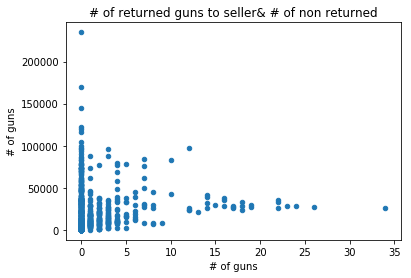

In [82]:
df.plot(x='combined_returned_to_seller',y='combined_guns',kind='scatter');
plt.title('# of returned guns to seller& # of non returned')
plt.xlabel('# of guns')
plt.ylabel('# of guns');
###what about the guns that returned to the seller..!
###    lets see if all guns are still with its owner or they returned them to the seller with the price of each guns
###'''most of sld guns arent returned ,but there is some states that gave back its gun appears in 1:5 in the graph
###and from 5 to 35 guns that returned to seller are very small compared to the 0anount that returned'''

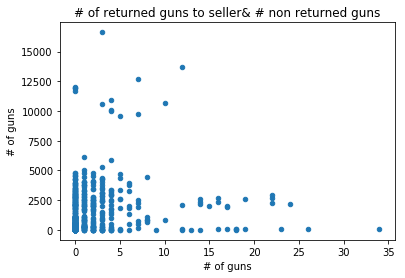

In [83]:
df.plot(x='combined_returned_to_seller',y='comined_redemption_guns',kind='scatter');
plt.title('# of returned guns to seller& # non returned guns')
plt.xlabel('# of guns')
plt.ylabel('# of guns');
###    lets see if all guns are still with its owner or they returned them to the seller with the price of each guns

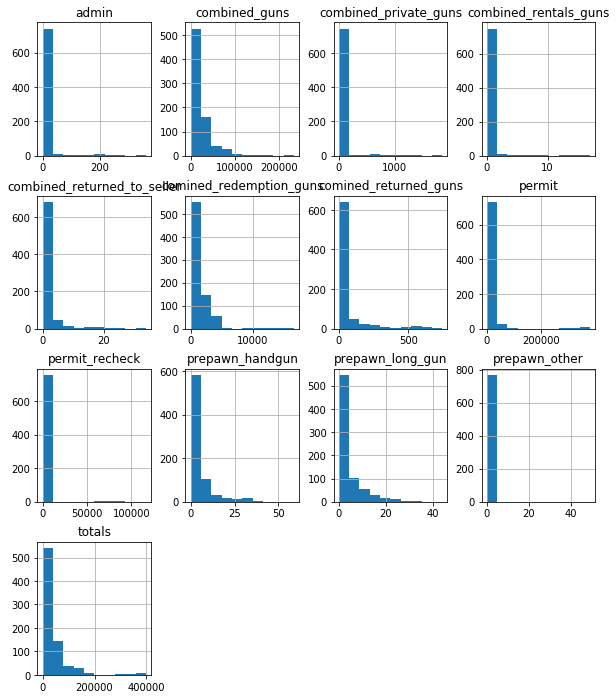

In [84]:
df.hist(figsize=(10,12));
###lets see the columns with visuals instead of reading every column
###'''for combined_guns we see that the most states have a low quantity of guns despite there are alots of guns in other states.
###some states have sold more than 50,000 guns while the most below that number'''

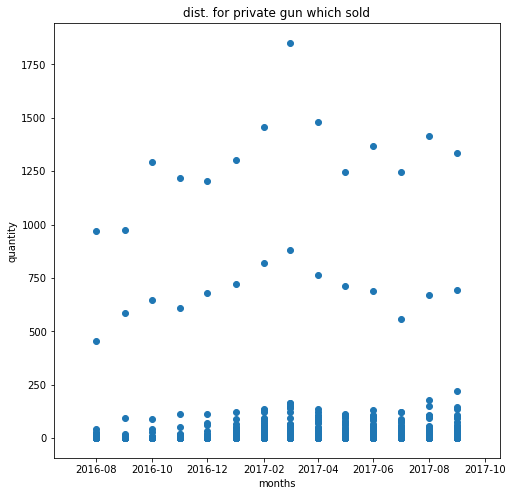

In [85]:
df['month'] = pd.to_datetime(df['month'])
plt.figure(figsize=(8, 8))
plt.scatter(df['month'].values, df['combined_private_guns']);
plt.title('dist. for private gun which sold')
plt.xlabel('months')
plt.ylabel('quantity');
###now we can see which month have the biggest sell for guns(we can see 3-2017,more than 1750 private guns were sold)

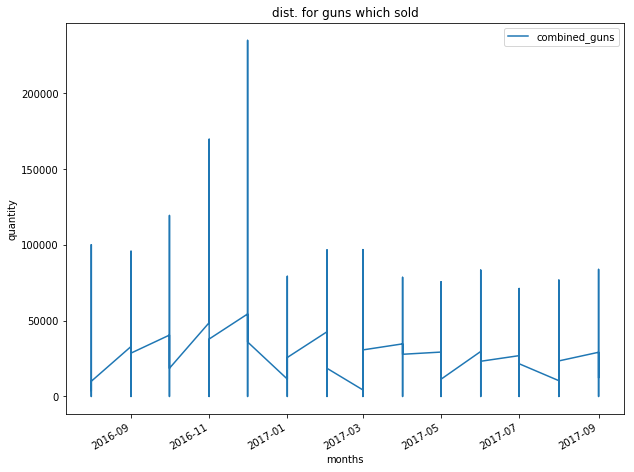

In [86]:

df.plot(kind='line', x='month', y='combined_guns',figsize=(10,8))
###"""lets use line graphs
##figsize is the shape of the graph 
#x is the horozontal line
####y is the vertical line"""
plt.title('dist. for guns which sold')
###"""we need to know what the graph represents that is mission for the title"""
plt.xlabel('months')
###'''now we need to know the x line represents'''
plt.ylabel('quantity');
###'''now we need to know the y line represents'''
###what about using line graphs to do the same as above with a different kind of graphs
### (in 12-2016 is the month with the biggest sold guns)

<a id='conclusions'></a>
## Conclusions

>Now we can know in each state how many private guns(and the other guns data)are sold.

>And also knowing how many guns are sold in each month 

## My opinion about the dataset: 

>*i got the info i need to answer my questions,but in my point of view they gave aspecific data that i didn't need
like:data about each type of gun(handgun,long gun,other),they must have one option show all types or not.
Example:pistols,Assult Riffle,semimachine gun,sniper and etc..i deleted them as they gave us OTHER guns ,so why making diffrentiation in the first place

>*i think the size of the dataset gave me agood info to have agood conclusion from it

>*i think i got to difficalities in this dataset.like there is no duplicates

>*dropping missing data is not abig deal as i got the overview of the dataset,i'm not searching for specific something

>*the data was too close to each other as we saw in the above graphs, i think we need statistical hypothesis testing 

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0